# Titanic Survision (Supervised Learning - Classification)

**<span style="color:Orange">Note that:</span> This project has been solved ealier on; see my link below about my page on Kaggle.**

[My submission on Kaggle Titanic Project](https://www.kaggle.com/c/titanic/submissions)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
sns.set(rc = {"figure.figsize":[6,6]}, font_scale=1)

In [2]:
Training = pd.read_csv('train.csv')
Testing = pd.read_csv('test.csv')

In [3]:
local_path = r"C:\Users\Ahmed\Downloads\Handson-ML\Titanic Survision project"

def save_figure(fig_name, thight_layout=True, extension="png", resolution = 300):
    # create full local path with figure name
    path = os.path.join(local_path + fig_name + "." + extension)
    if thight_layout:
        plt.thight_layout()
    # save figure
    plt.savefig(path, format = extension, dpi = resolution)

In [4]:
Training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Vsiualizeing Dataset

In [5]:
Training["PassengerId"].value_counts()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

In [6]:
Training["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

**There are 549 un-servaived and 342 survived**

In [7]:
Training["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

**There are three types of different places 3-> Lower, 1-> Upper, 2-> Middle as social-economic**

In [8]:
Training["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**The chip contain as total 891 peopel 577 Male and 314 Female**

In [9]:
Training["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

**THe SibSp means brother, sister, stepbrother, stepsister each family had**

* for example class 0 means a family had 608 sub-members such as sister, stepbrother, brother...etc for each family.
* also for class 8 that had 7 family each on had 8 sub-members and so on.

**Spouse means a husband and wife for each family (mistresses and fiancés were ignored)**

* The class 0,1...6 means the importance of family

In [10]:
Training["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

**parch abbriviation for parent and children that each family had**
* parch: The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson

In [11]:
Training["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

**Embarked**

* Southampton: ساوثهامبتون
* Queenstown: كوينزتاون
* Cherbourg: شيربورج

In [12]:
Training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Cabin '204' had missing value and Age '714'**

In [13]:
Training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* 25% of Age less than 20 years below the mean.
* 50% the median Age is 28 years of each passanger.
* 75% of the passanger less than 38 years and ablove that is possible.

**Looking for a realtions**

In [14]:
Training.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096066
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096066,0.159651,0.216225,1.000000


**There\`s no realtion between each features hence the dataset isn\`s linear, ofcourse we are looking for survision peopele therefore the dataset is classification and it\`s supervised learning**

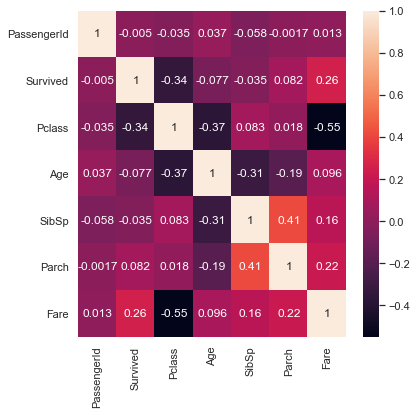

In [15]:
sns.heatmap(Training.corr(), annot=True)

**Since the dataset is classification we don\`t need the correlation coefficient it\`s not neccessary needed.**

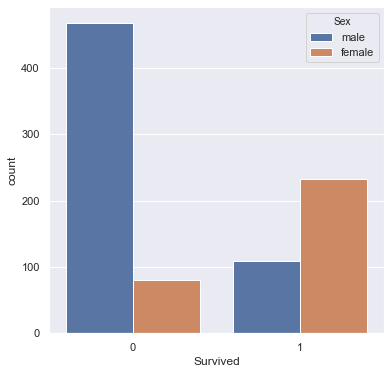

In [16]:
sns.countplot(x=Training["Survived"], hue=Training["Sex"])
plt.show()

**We see that male are un-survived that female ofcourse a little female were dead**
* We concolude that female mode survived than male

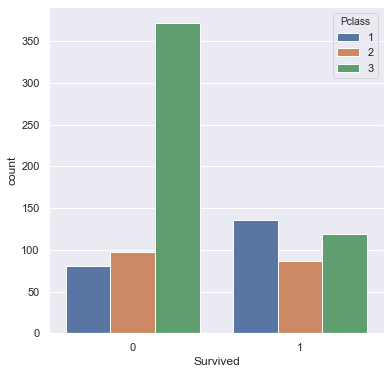

In [17]:
# let`s see the type of class each on survived
sns.countplot(x=Training["Survived"], hue=Training["Pclass"])
plt.show()

**Note that class 1 means upper which means more importance**
* Class 3 huge people were dead and approximatily 120 lived.
* class 1 more survived once.

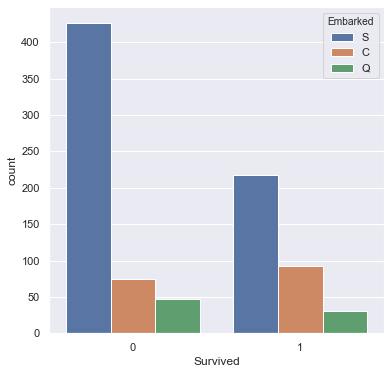

In [18]:
#What about the Embarked
sns.countplot(x=Training["Survived"], hue=Training["Embarked"])
plt.show()

**The Embarked means Southampton, Queenstown, Cherbourg**
* More deaths in Southampton.
* Cherbourg is most survived once.
* Queenstown is less un-survived people.

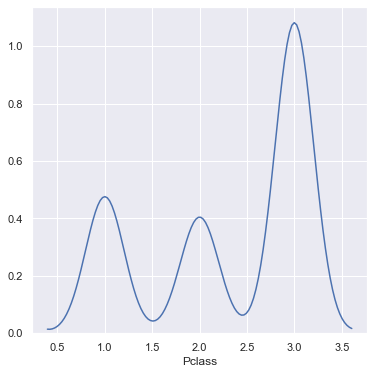

In [19]:
# It`s not normal distribution
sns.distplot(Training["Pclass"], hist=False)
plt.show()

**Graph Summray**

* Felmales are more survived passanger.
* Class 1 more survived against class 3.
* Cherbourg had more survived passanger than Southampton.

## Working with messing data
### First numerical data

In [20]:
Training["Age"].isnull().sum() # 177 missimg value
# The question is how to reduce it ?

177

In [21]:
Training.describe()["Age"].to_frame()

,Age
count,714.000000
mean,29.699113
std,14.526507
min,0.416700
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


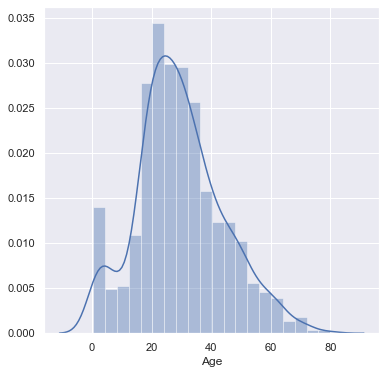

In [22]:
# 25% of Age less than 20 years below the mean.
# 50% the median Age is 28 years of each passanger.
# 75% of the passanger less than 38 years and ablove that is possible.
sns.distplot(Training["Age"])
plt.show()

### Second categorical data

In [23]:
# handle it or reduce it !?
Training["Cabin"].isnull().sum()

687

# Preorocessing
## Using Pipeline and ColumnTransformer

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# median_age = int(Training["Age"].median())

numerical = Pipeline([("imputer", SimpleImputer(strategy='median')),
            ("scaling", StandardScaler())])

categorical = Pipeline([ ("imputer", SimpleImputer(strategy='most_frequent'))
                        , ("Encoding",OneHotEncoder(sparse=False))])

numerical_attributes = ["Age","SibSp", "Parch", "Fare"]
categroical_attributes = ["Pclass", "Sex", "Embarked"]

preprocessing_pipelines = ColumnTransformer([("N", numerical, numerical_attributes),
                  ("C", categorical, categroical_attributes)])

# Assign y label to another variable spread from other features
y_train = Training["Survived"]
# Transform Traioning and Testing
X_train = preprocessing_pipelines.fit_transform(Training[numerical_attributes + categroical_attributes])
X_test = preprocessing_pipelines.transform(Testing[numerical_attributes + categroical_attributes])

In [25]:
print(Training.shape)
print(Testing.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(891, 12)
(418, 11)
(891, 12)
(418, 12)
(891,)


## Traning Machine Learning

In [26]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=42)
fitted_mdel = RFC.fit(X_train, y_train)

# predict X_train
y_prediction = fitted_mdel.predict(X_train)
# There`s no y_true to test

print(RFC.score(X_train, y_train))

0.9797979797979798


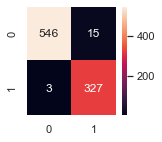

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# confusion Matrix
plt.figure(figsize=(2,2))
CM = confusion_matrix(y_prediction, y_train)
sns.heatmap(CM, annot = True,fmt= "0.0f" )
plt.show()

In [28]:
print(precision_score(y_prediction, y_train))
print(recall_score(y_prediction, y_train))
print(f1_score(y_prediction, y_train))

0.956140350877193
0.990909090909091
0.9732142857142858


## Save 418 predictions on csv

In [29]:
# predict unkown y_test
y_test_pred = fitted_mdel.predict(X_test)

In [30]:
predictions_file = pd.DataFrame(y_test_pred, index = Testing["PassengerId"] , columns =["y_test_predicted"])

predictions_file.to_csv("y_test_predictions.csv")

## Try to predict by an instance

* if prediction is **0** then it\`s unsurvivied, otherwise if it\`s **1** then survived

In [31]:
# create an instance one
instance = pd.DataFrame( columns= ["Age","SibSp", "Parch", "Fare", "Pclass", "Sex", "Embarked"], 
                        data  = [[34.5, 0, 0, 7.8292, 3, "male", "Q"]])

# create an instance two
instance2 = pd.DataFrame( columns= ["Age","SibSp", "Parch", "Fare", "Pclass", "Sex", "Embarked"], 
                        data  = [[38.0, 1, 0, 71.2833, 1, "female", "C"]])

In [32]:
# transform this instance to numeric
instance_transformed = preprocessing_pipelines.transform(instance2)
# predict non-surviveed / survived
fitted_mdel.predict(instance_transformed)

array([1], dtype=int64)

**<span style="color:blue">Note that:</span>**
* In the first instance the model predict it\`s non-survived and the second instance the model predict he/she was survivrd based on current dataset.

# Model and Pipeline dump & Predict by an instance

In [53]:
import joblib

joblib.dump(fitted_mdel,"RandomForestClssifier.h5")
joblib.dump(preprocessing_pipelines,"Full_Pipelines.h5")
joblib.dump(numerical_attributes + categroical_attributes, "Columns.h5")
# sucessfuly dumped

['Columns.h5']

In [67]:
# load and using all pipelines transformation to create new instance
new_instance = pd.DataFrame( columns= ["Age","SibSp", "Parch", "Fare", "Pclass", "Sex", "Embarked"], 
                        data  = [[52.0, 1, 0, 71.2833, 1, "male", "C"]])

full_pipeline = joblib.load("Full_Pipelines.h5")
new_transform = full_pipeline.transform(new_instance)

In [68]:
# try loading and predicting dumped RandomForestClassifier using instance two
model = joblib.load("RandomForestClssifier.h5")
model.predict(new_transform)

array([1], dtype=int64)

# Project Finished